In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import unicodedata

In [2]:
df_terceirizados = pd.read_csv('./extracao_dados/terceirizados_consolidados.csv', low_memory = False)

In [3]:
df_terceirizados.head()

,Órgão,Unidade Gestora,Fornecedor,Número Contrato,CPF,Nome,Função,Descrição Complementar,Jornada Semanal,Unidade,Custo do posto,Auxílio Trasporte,Vale Alimentação,Escolaridade,Data Início,Data Fim,Situação
0,26266 - FUNDACAO UNIVERSIDADE FEDERAL DO PAMPA,154359 - UNIPAMPA,10.439.655/0001-14 - PHENIX SOLUCOES LTDA,00003/2017,***.043.350-**,DANIEL SOARES DE ALMEIDA,Almoxarife,NaN,30,BAGÉ,"R$ 2.239,48","R$ 0,00","R$ 0,00",06 – Ensino Médio Completo,05/12/2018,NaN,Ativo
1,63000 - ADVOCACIA-GERAL DA UNIAO,110097 - SAD4R/AGU,13.697.422/0001-00 - GED PRESTADORA DE SERVICO...,00012/2020,***.566.379-**,ALESSANDRA LOPES FERREIRA,Agente administrativo,NaN,40,EA FOZ DO IGUAÇU/ AGU/PR,"R$ 3.535,06","R$ 0,00","R$ 0,00",06 – Ensino Médio Completo,28/07/2021,NaN,Ativo
2,30203 - INSTIT.NAC. DE METROLOG. QUALID. E TEC...,183039 - SURRS,04.321.961/0002-30 - BRAVHA SERVICOS LTDA,00018/2021,***.518.920-**,DARLEN PATRÍCIA VIANA DOS SANTOS,Auxiliar de Limpeza,SERVENTE DE LIMPEZA,40,SURRS/NUADM,"R$ 4.086,76","R$ 4,80","R$ 22,00",03 – Ensino Fundamental Incompleto,25/09/2023,27/09/2023,Inativo
3,36201 - FUNDACAO OSWALDO CRUZ,254462 - COGIC/FIOCRUZ,16.099.194/0001-64 - ELETRODATA ENGENHARIA LTDA,00051/2019,***.763.787-**,EVERTON DOS SANTOS SILVA,Oficial de manutenção predial,AUXILIAR - MANUTENÇÃO CIVIL - ELÉTRICA / MEIO-...,44,COGIC,"R$ 6.220,25","R$ 16,20","R$ 28,84",06 – Ensino Médio Completo,23/12/2019,NaN,Ativo
4,36201 - FUNDACAO OSWALDO CRUZ,254462 - COGIC/FIOCRUZ,16.099.194/0001-64 - ELETRODATA ENGENHARIA LTDA,00051/2019,***.863.497-**,IREMAR ROQUE DA CRUZ,Oficial de manutenção predial,OFICIAL - MANUTENÇÃO CIVIL - PEDREIRO,44,COGIC,"R$ 6.671,02","R$ 0,00","R$ 28,84",06 – Ensino Médio Completo,23/12/2019,NaN,Ativo


In [5]:
df_terceirizados.shape

(49091, 17)

In [14]:
# Colunas a tratar
colunas_valores = ['Custo do posto', 'Auxílio Trasporte', 'Vale Alimentação']

In [15]:
# Função de limpeza
def limpar_valor(valor):
    if pd.isna(valor):
        return 0.0
    return float(valor.replace('R$', '').replace('.', '').replace(',', '.').strip())

In [16]:
# Aplicar transformação
for col in colunas_valores:
    df_terceirizados[col] = df_terceirizados[col].astype(str).apply(limpar_valor)

In [22]:
# Converter colunas para datetime
df_terceirizados['Data Início'] = pd.to_datetime(df_terceirizados['Data Início'], format="%d/%m/%Y", errors='coerce')
df_terceirizados['Data Fim'] = pd.to_datetime(df_terceirizados['Data Fim'], format="%d/%m/%Y", errors='coerce')

In [23]:
df_ativos = df_terceirizados[df_terceirizados['Situação'] == 'Ativo']

In [24]:
df_ativos.shape

(39466, 17)

In [25]:
df_ativos.columns

Index(['Órgão', 'Unidade Gestora', 'Fornecedor', 'Número Contrato', 'CPF',
       'Nome', 'Função', 'Descrição Complementar', 'Jornada Semanal',
       'Unidade', 'Custo do posto', 'Auxílio Trasporte', 'Vale Alimentação',
       'Escolaridade', 'Data Início', 'Data Fim', 'Situação'],
      dtype='object')

In [26]:
df_ativos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39466 entries, 0 to 49090
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Órgão                   39466 non-null  object        
 1   Unidade Gestora         39466 non-null  object        
 2   Fornecedor              39466 non-null  object        
 3   Número Contrato         39466 non-null  object        
 4   CPF                     39466 non-null  object        
 5   Nome                    39466 non-null  object        
 6   Função                  39466 non-null  object        
 7   Descrição Complementar  18616 non-null  object        
 8   Jornada Semanal         39466 non-null  int64         
 9   Unidade                 39458 non-null  object        
 10  Custo do posto          39466 non-null  float64       
 11  Auxílio Trasporte       39466 non-null  float64       
 12  Vale Alimentação        39466 non-null  float6

In [28]:
# Agrupar por função e calcular média do custo do posto
top_funcoes_custo = (
    df_ativos.groupby('Função')['Custo do posto']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

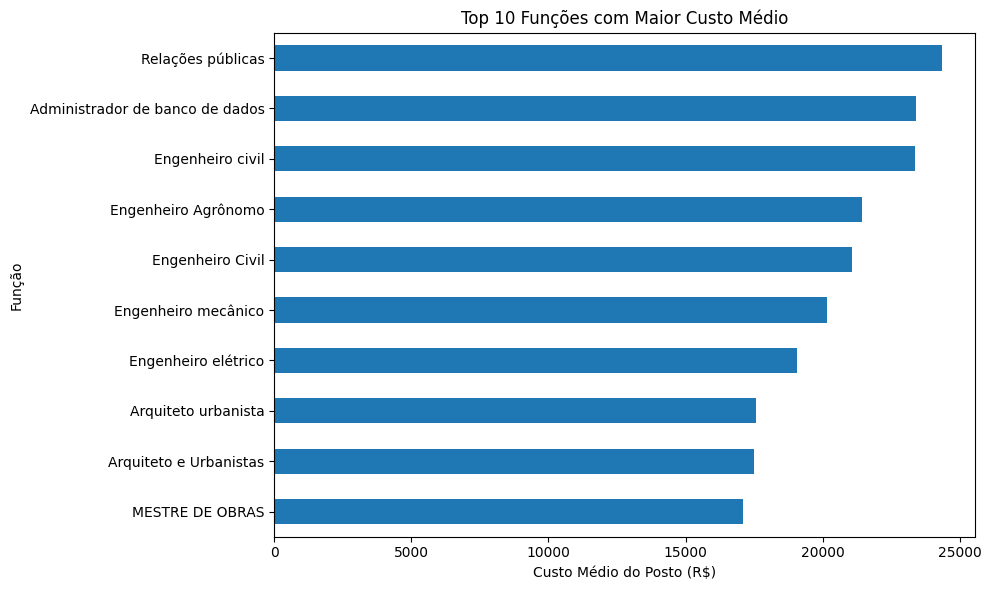

In [29]:
# Plotar gráfico
plt.figure(figsize=(10, 6))
top_funcoes_custo.plot(kind='barh')
plt.xlabel('Custo Médio do Posto (R$)')
plt.title('Top 10 Funções com Maior Custo Médio')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [30]:
df_ativos['Custo por hora'] = df_ativos['Custo do posto'] / df_ativos['Jornada Semanal']

/var/folders/44/wjzjf_412m1cl66j1pj3b0_00000gn/T/ipykernel_1678/3608702499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ativos['Custo por hora'] = df_ativos['Custo do posto'] / df_ativos['Jornada Semanal']


In [31]:
top_funcoes_custo_hora = (
    df_ativos.groupby('Função')['Custo por hora']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

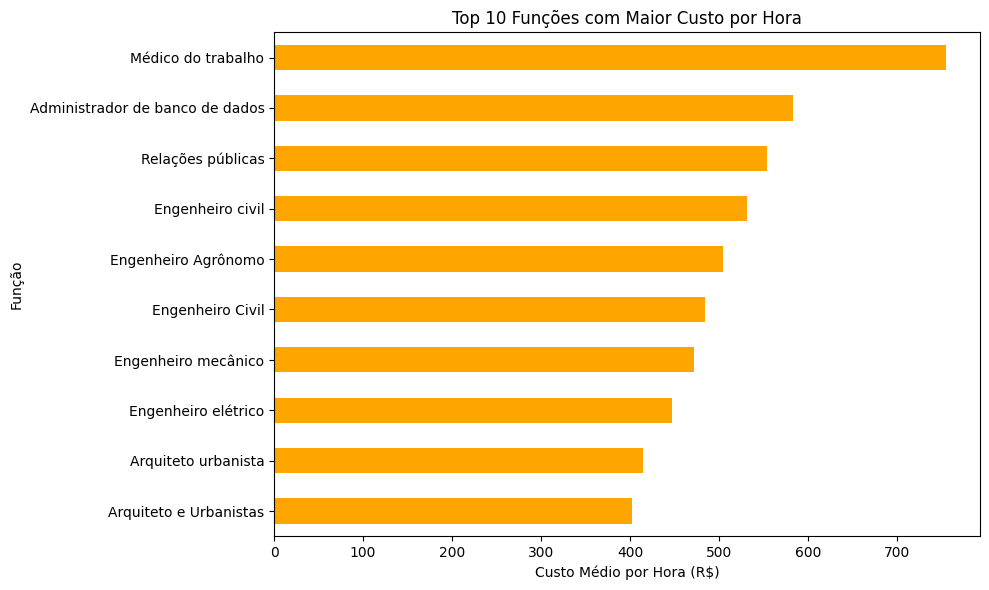

In [32]:
# Plotar gráfico
plt.figure(figsize=(10, 6))
top_funcoes_custo_hora.plot(kind='barh', color='orange')
plt.xlabel('Custo Médio por Hora (R$)')
plt.title('Top 10 Funções com Maior Custo por Hora')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()